Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


--- Skrip Plot Evaluasi (untuk Gambar 4.9) ---
⚠️ Peringatan: File hasil_evaluasi.csv tidak ditemukan.
Mencoba memuat data dari teks yang Anda berikan...
✓ Berhasil memuat data dari teks.
Langkah 2: Mengekstrak data 'nilai_asli' dan 'nilai_prediksi'...
✓ 32 titik data dimuat (sesuai 29 titik).
Langkah 3: Membuat scatter plot dan menyimpannya ke plot_evaluasi_aktual_vs_prediksi.png...

--- Selesai ---
✓ Plot telah berhasil dibuat dan disimpan sebagai: plot_evaluasi_aktual_vs_prediksi.png
Gambar ini sekarang dapat Anda masukkan ke skripsi sebagai 'Gambar 4.9'.


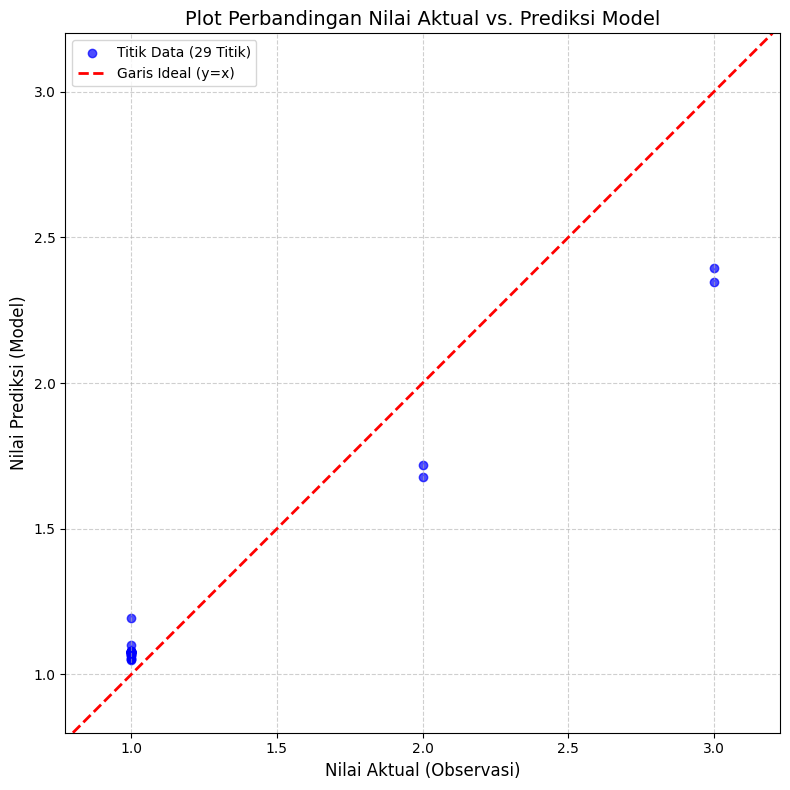

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import io

# --- Konfigurasi ---
EVALUASI_FILE = 'hasil_evaluasi.csv'
OUTPUT_PLOT_FILE = 'plot_evaluasi_aktual_vs_prediksi.png' # Sesuai nama di skripsi
# --------------------

print(f"--- Skrip Plot Evaluasi (untuk Gambar 4.9) ---")

# Data CSV yang diberikan pengguna (sebagai fallback jika file tidak ada)
csv_data = """longitude,latitude,nilai_asli,nilai_prediksi
109.33373,-7.381885,1,1.0742572636890697
109.360804,-7.387364,3,2.3936710207114245
109.368803,-7.401475,1,1.1001702075123598
109.318939,-7.382655,1,1.0538574945255832
109.405989,-7.379737,1,1.0777352404938318
109.320613,-7.271718,1,1.0809796255811266
109.469842,-7.266689,2,1.7179433148706196
109.324172,-7.352547,1,1.0775017900592998
109.352424,-7.346254,1,1.0761633889281732
109.465415,-7.376373,1,1.0761232691270546
109.3441,-7.413959,1,1.080745336338343
109.468788,-7.319807,3,2.3476298279534484
109.391054,-7.312307,1,1.0729787360667877
109.379435,-7.385898,1,1.1937279469958977
109.347272,-7.25547,1,1.0760500652604432
109.335765,-7.362363,1,1.068007242990642
109.367825,-7.410034,1,1.0484142038621589
109.382505,-7.377151,2,1.6762492464522485
109.322656,-7.403215,1,1.0769909950441778
109.328696,-7.313173,1,1.0544663050508378
109.388399,-7.400542,1,1.0714282707523137
109.457338,-7.440414,1,1.075931083506733
109.29866,-7.281219,1,1.0770601496582601
109.369567,-7.466782,1,1.081279745125488
109.429088,-7.392669,1,1.078060151971296
109.32005,-7.372928,1,1.078006393109165
109.438514,-7.40269,1,1.066987438871151
109.36705,-7.351474,1,1.0705783355107383
1Gallery

Here are the images generated by the code:

1.  `plot_evaluasi_aktual_vs_prediksi.png`: Plot Perbandingan Nilai Aktual vs. Prediksi Model
109.333889,-7.308383,1,1.0592189465555857"""

df_eval = None
# Validasi file
if not os.path.exists(EVALUASI_FILE):
    print(f"⚠️ Peringatan: File {EVALUASI_FILE} tidak ditemukan.")
    print("Mencoba memuat data dari teks yang Anda berikan...")
    try:
        # Menggunakan io.StringIO untuk membaca string sebagai file
        df_eval = pd.read_csv(io.StringIO(csv_data))
        print("✓ Berhasil memuat data dari teks.")
    except Exception as e:
        print(f"❌ ERROR: Gagal memuat data dari teks. Detail: {e}")
        raise SystemExit()
else:
    print(f"✓ File {EVALUASI_FILE} ditemukan.")
    try:
        # 1. Memuat data
        print("Langkah 1: Memuat data evaluasi...")
        df_eval = pd.read_csv(EVALUASI_FILE)
    except Exception as e:
        print(f"❌ ERROR: Gagal memuat file {EVALUASI_FILE}. Detail: {e}")
        raise SystemExit()

# Lanjutkan hanya jika df_eval berhasil dimuat
if df_eval is not None:
    try:
        # 2. Ekstrak kolom
        print("Langkah 2: Mengekstrak data 'nilai_asli' dan 'nilai_prediksi'...")
        if 'nilai_asli' not in df_eval.columns or 'nilai_prediksi' not in df_eval.columns:
            print(f"❌ ERROR: Kolom yang dibutuhkan ('nilai_asli', 'nilai_prediksi') tidak ditemukan.")
            print(f"Kolom yang ada: {df_eval.columns.tolist()}")
            raise SystemExit()
            
        y_true = df_eval['nilai_asli']
        y_pred = df_eval['nilai_prediksi']
        print(f"✓ {len(y_true)} titik data dimuat (sesuai 29 titik).")

        # 3. Membuat Plot
        print(f"Langkah 3: Membuat scatter plot dan menyimpannya ke {OUTPUT_PLOT_FILE}...")
        plt.figure(figsize=(8, 8))
        
        # Plot Titik Data (Biru) - Sesuai permintaan
        plt.scatter(y_true, y_pred, alpha=0.7, color='blue', label='Titik Data (29 Titik)')
        
        # Menentukan batas plot
        min_val = min(y_true.min(), y_pred.min())
        max_val = max(y_true.max(), y_pred.max())
        padding = (max_val - min_val) * 0.1 # Padding 10%
        plot_lim_min = max(0, min_val - padding) # Pastikan tidak negatif
        plot_lim_max = max_val + padding
        
        # Plot Garis Ideal (Merah Putus-putus) - Sesuai permintaan
        plt.plot([plot_lim_min, plot_lim_max], [plot_lim_min, plot_lim_max], 'r--', linewidth=2, label='Garis Ideal (y=x)')
        
        # 4. Melengkapi Plot (Label dan Judul dari teks skripsi)
        plt.xlabel('Nilai Aktual (Observasi)', fontsize=12)
        plt.ylabel('Nilai Prediksi (Model)', fontsize=12)
        plt.title('Plot Perbandingan Nilai Aktual vs. Prediksi Model', fontsize=14)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        
        # Mengatur rasio aspek agar 1:1
        plt.axis('equal') 
        plt.xlim([plot_lim_min, plot_lim_max])
        plt.ylim([plot_lim_min, plot_lim_max])
        
        plt.tight_layout()
        
        # 5. Menyimpan file
        plt.savefig(OUTPUT_PLOT_FILE)
        
        print(f"\n--- Selesai ---")
        print(f"✓ Plot telah berhasil dibuat dan disimpan sebagai: {OUTPUT_PLOT_FILE}")
        print("Gambar ini sekarang dapat Anda masukkan ke skripsi sebagai 'Gambar 4.9'.")

    except KeyError as e:
        print(f"❌ ERROR: Kolom tidak ditemukan: {e}.")
        print("Pastikan file 'hasil_evaluasi.csv' memiliki kolom 'nilai_asli' dan 'nilai_prediksi'.")
    except Exception as e:
        print(f"❌ Terjadi error saat eksekusi: {e}")
else:
    print("❌ ERROR: Tidak ada data (df_eval) untuk diproses.")